In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# Read the training dataset in a dataframe using Pandas
# df = pd.read_csv("/Users/zhenxingzhang/Documents/AnalyticsVidhya/DataScienceFromScrath/train_u6lujuX.csv")
df = pd.read_csv("/home/zhenxing/Documents/Experiment/AnalyticsVidhya/DataScienceFromScrath/train_u6lujuX.csv")
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,NaN,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196,267,360,1,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516,95,360,1,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504,158,360,0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526,168,360,1,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968,349,360,1,Semiurban,N


In [12]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

# Distribution Analysis

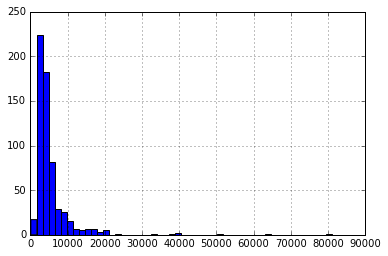

In [13]:
df['ApplicantIncome'].hist(bins=50)

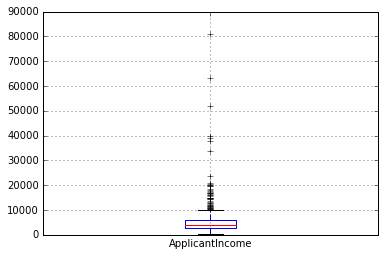

In [18]:
df.boxplot(column = 'ApplicantIncome', return_type='axes')

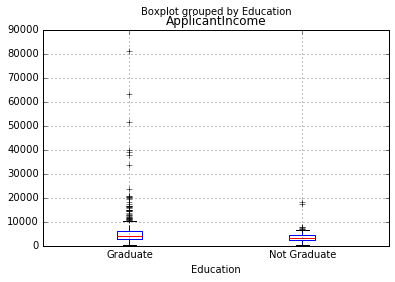

In [19]:
df.boxplot(column='ApplicantIncome', by = 'Education')

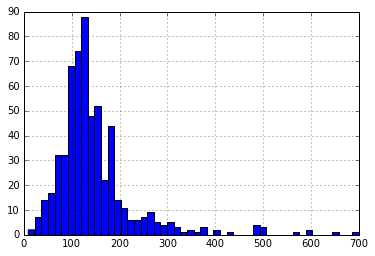

In [23]:
df['LoanAmount'].hist(bins=50)

{'boxes': [<matplotlib.lines.Line2D at 0x111d13610>],
 'caps': [<matplotlib.lines.Line2D at 0x111d20510>,
 'fliers': [<matplotlib.lines.Line2D at 0x111d2d810>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x111d2d1d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x111ba0ad0>,
  <matplotlib.lines.Line2D at 0x111d13e90>]}

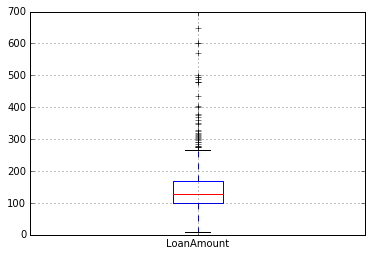

In [31]:
df.boxplot(column = 'LoanAmount', return_type='dict')

In [15]:
temp1 = df['Credit_History'].value_counts(ascending= True)
print temp1

temp2 = df['Loan_Status'].value_counts(ascending= True)
print temp2

temp3 = df.pivot_table(values='Loan_Status', index=['Credit_History'], aggfunc = lambda x:x.map({'Y':1, 'N':0}).mean())
print temp3

0     89
1    475
dtype: int64
N    192
Y    422
dtype: int64
Credit_History
0    0.078652
1    0.795789
Name: Loan_Status, dtype: float64


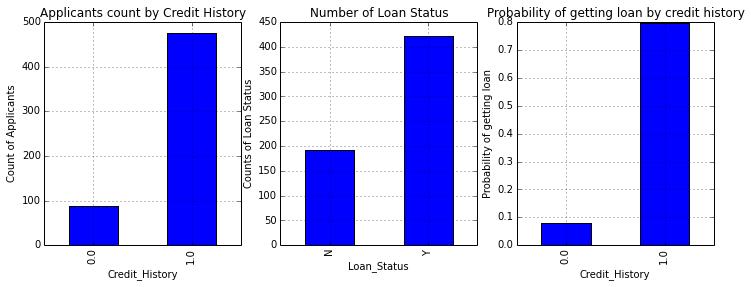

In [25]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(131)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants count by Credit History")
temp1.plot(kind="bar")

ax2 = fig.add_subplot(132)
ax2.set_xlabel('Loan_Status')
ax2.set_ylabel('Counts of Loan Status')
ax2.set_title("Number of Loan Status")
temp2.plot(kind = 'bar')


ax3 = fig.add_subplot(133)
ax3.set_xlabel('Credit_History')
ax3.set_ylabel('Probability of getting loan')
ax3.set_title("Probability of getting loan by credit history")
temp3.plot(kind='bar')